In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import sklearn.model_selection as ms
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

Реализация:

In [92]:
class Node():
    def __init__(self, j, t):
        self.j = j
        self.t = t
        self.left = None
        self.right = None
        self.Y = None

class DecisionTree(BaseEstimator):
    
    def __init__(self, max_depth=1):
        self.max_depth = max_depth
        self.root = None
        
    def H(self, R_Y):
        if (len(R_Y) == 0):
            return 0
        return mean_squared_error(R_Y, np.ones(R_Y.shape[0]) * R_Y.mean())
    
    def G(self, j, t, X, Y):
        L = X[X[:, j] < t]
        L_Y = Y[X[:, j] < t]
        R = X[X[:, j] >= t]
        R_Y = Y[X[:, j] >= t]
        return (L.shape[0] / X.shape[0] * self.H(L_Y) + R.shape[0] / X.shape[0] * self.H(R_Y)), L, L_Y, R, R_Y 

    def fit(self, X, Y):    
        def fit1(X, Y, depth):
            if depth == self.max_depth:
                return None

            min_val = (1e15, 0, 0, 0, 0)
            j_opt, t_opt = 0, 0
            if len(X) == 0:
                return None
            for j in range(len(X[0])): # при желании можно заменить на метод scipy.optimize.minimize
                for t in range(len(X[0])):
                    res, l, l_y, r, r_y = self.G(j, t, X, Y)
                    if (res < min_val[0]):
                        min_val = res, l, l_y, r, r_y
                        j_opt = j
                        t_opt = t

            node = Node(j_opt, t_opt)
            _, L, L_Y, R, R_Y = min_val
            node.left = fit1(L, L_Y, depth + 1)
            node.right = fit1(R, R_Y, depth + 1)
            if (depth + 1 == self.max_depth):
                node.Y = Y
            return node
        self.root = fit1(X, Y, 0)
            
    def predict(self, x):
        cur_node = self.root
        while (cur_node != None):
            if (cur_node.Y != None):
                return cur_node.Y.mean()
            j = cur_node.j
            t = cur_node.t
            if (x[j] < t):
                cur_node = cur_node.left
            else:
                cur_node = cur_node.right

In [93]:
boston = load_boston()
data = boston.data
target = boston.target
X_train, X_test, y_train, y_test = ms.train_test_split(data, target, test_size=0.25, random_state=42)

In [99]:
estimator = DecisionTree(max_depth=3)
estimator.fit(X_train, y_train)
y_prediction = [estimator.predict(x) for x in X_test]
mean_squared_error(y_prediction, y_test)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


55.877187338545824

In [100]:
estimator = DecisionTree(max_depth=5)
estimator.fit(X_train, y_train)
y_prediction = [estimator.predict(x) for x in X_test]
mean_squared_error(y_prediction, y_test)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


47.125743272332706

In [102]:
errors = []
for n in range(1, 10):
    print(n)
    estimator = DecisionTree(max_depth=n)
    estimator.fit(X_train, y_train)
    y_prediction = [estimator.predict(x) for x in X_test]
    errors.append(mean_squared_error(y_prediction, y_test))

1
2
3


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


4
5
6
7
8
9


In [104]:
for n in range(10, 15):
    print(n)
    estimator = DecisionTree(max_depth=n)
    estimator.fit(X_train, y_train)
    y_prediction = [estimator.predict(x) for x in X_test]
    errors.append(mean_squared_error(y_prediction, y_test))

10


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


11
12
13
14


In [120]:
tree_error = []
for n in range(1, 15):
    tree_estimator = DecisionTreeRegressor(max_depth=n)
    tree_estimator.fit(X_train, y_train)
    pr = tree_estimator.predict(X_test)
    tree_error.append(mean_squared_error(pr, y_test))

Построим график метрики точности:

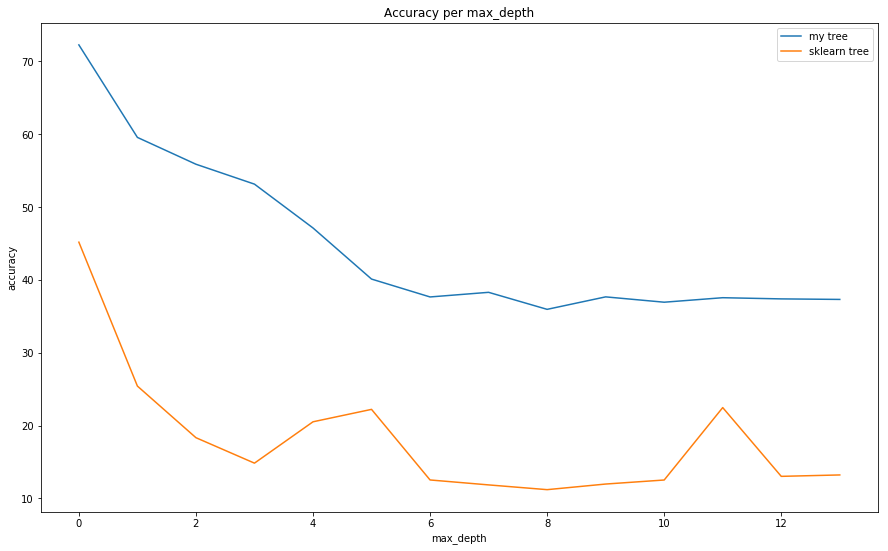

In [124]:
plt.figure(figsize=(15,9))
plt.title('Accuracy per max_depth')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.plot(errors, label='my tree')
plt.plot(tree_error, label='sklearn tree')
plt.legend(loc='best')

Как видим, работает немного хуже, чем у реализации из библиотеки.